In [1]:
import tensorflow as tf
import keras
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.applications.resnet import ResNet50
from keras.applications.resnet import ResNet50
from keras.applications.resnet import decode_predictions
from keras.applications.resnet import preprocess_input
from keras.models import Model,Sequential
from keras.layers import Input,UpSampling2D,Flatten,BatchNormalization,Dense,Dropout,GlobalAveragePooling2D
from keras import optimizers
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from glob import glob
from PIL import Image

In [3]:
train = 'C:/Users/Akshay.Patil/Documents/Akaike Data Scientist Hiring Challenge/dataset/train'
test = 'C:/Users/Akshay.Patil/Documents/Akaike Data Scientist Hiring Challenge/dataset/test'

In [5]:
folders = glob('C:/Users/Akshay.Patil/Documents/Akaike Data Scientist Hiring Challenge/dataset/train/*')
print(len(folders))
num_classes = 4
nb_epochs = 10

4


In [6]:
IMAGE_SIZE = [224, 224]

In [7]:
NUM_CLASSES = 4

CHANNELS = 3

IMAGE_RESIZE = 224
RESNET50_POOLING_AVERAGE = 'avg'
DENSE_LAYER_ACTIVATION = 'softmax'
OBJECTIVE_FUNCTION = 'categorical_crossentropy'

LOSS_METRICS = ['accuracy']

NUM_EPOCHS = 10
EARLY_STOP_PATIENCE = 3

STEPS_PER_EPOCH_TRAINING = 10
STEPS_PER_EPOCH_VALIDATION = 10

BATCH_SIZE_TRAINING = 100
BATCH_SIZE_VALIDATION = 100

In [9]:
resnet= ResNet50(include_top=False, weights='imagenet',input_shape=IMAGE_SIZE + [3])

94781440/94765736 [==============================] - 22s 0us/step


In [10]:
from keras.models import Model,Sequential
model = Sequential()

model.add(ResNet50(include_top = False, pooling = RESNET50_POOLING_AVERAGE, weights = 'imagenet'))

model.add(Dense(NUM_CLASSES, activation = DENSE_LAYER_ACTIVATION))

model.layers[0].trainable = False

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 4)                 8196      
Total params: 23,595,908
Trainable params: 8,196
Non-trainable params: 23,587,712
_________________________________________________________________


In [12]:
from keras import optimizers

sgd = optimizers.SGD(lr = 0.01, decay = 1e-6, momentum = 0.9, nesterov = True)
model.compile(optimizer = sgd, loss = OBJECTIVE_FUNCTION, metrics = LOSS_METRICS)

C:\Users\Akshay.Patil\Anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [13]:
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

image_size = IMAGE_RESIZE

data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = data_generator.flow_from_directory(
        'C:/Users/Akshay.Patil/Documents/Akaike Data Scientist Hiring Challenge/dataset/train',
        target_size=(image_size, image_size),
        batch_size=BATCH_SIZE_TRAINING,
        class_mode='categorical')


validation_generator = data_generator.flow_from_directory(
        'C:/Users/Akshay.Patil/Documents/Akaike Data Scientist Hiring Challenge/dataset/test',
        target_size=(image_size, image_size),
        batch_size=BATCH_SIZE_VALIDATION,
        class_mode='categorical')

Found 1925 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


In [14]:
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')


test_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [15]:
fit_history = model.fit_generator(
        train_generator,
        steps_per_epoch=STEPS_PER_EPOCH_TRAINING,
        epochs = NUM_EPOCHS,
        validation_data=validation_generator,
        validation_steps=STEPS_PER_EPOCH_VALIDATION
        
)

C:\Users\Akshay.Patil\Anaconda3\lib\site-packages\keras\engine\training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
10/10 [==============================] - 84s 7s/step - loss: 1.0046 - accuracy: 0.6272 - val_loss: 0.0388 - val_accuracy: 0.9800
Epoch 2/10
10/10 [==============================] - 45s 4s/step - loss: 0.0546 - accuracy: 0.9878
Epoch 3/10
10/10 [==============================] - 47s 5s/step - loss: 0.0557 - accuracy: 0.9898
Epoch 4/10
10/10 [==============================] - 53s 5s/step - loss: 0.0325 - accuracy: 0.9916
Epoch 5/10
10/10 [==============================] - 53s 5s/step - loss: 0.0257 - accuracy: 0.9937
Epoch 6/10
10/10 [==============================] - 50s 5s/step - loss: 0.0521 - accuracy: 0.9927
Epoch 7/10
10/10 [==============================] - 50s 5s/step - loss: 0.0123 - accuracy: 0.9983
Epoch 8/10
10/10 [==============================] - 53s 5s/step - loss: 0.0245 - accuracy: 0.9935
Epoch 9/10
10/10 [==============================] - 53s 5s/step - loss: 0.0095 - accuracy: 0.9991
Epoch 10/10
10/10 [==============================] - 54s 5s/step - loss: 0.0

In [16]:
model.save("ResnetModel.h5")
print("Saved model to disk")

Saved model to disk


C:\Users\Akshay.Patil\Anaconda3\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [17]:
import numpy as np

from keras.preprocessing import image

In [18]:
from tensorflow.python.keras.models import load_model

In [20]:
test_image = image.load_img('C:/Users/Akshay.Patil/Documents/Akaike Data Scientist Hiring Challenge/dataset/test/Cars/01a281230e.jpg', target_size = (224, 224))

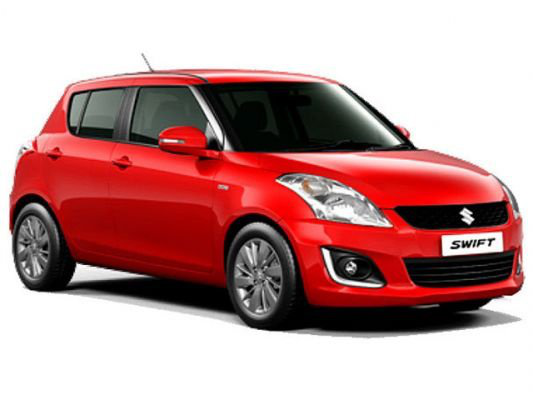

In [21]:
from IPython.display import display
img = Image.open('C:/Users/Akshay.Patil/Documents/Akaike Data Scientist Hiring Challenge/dataset/test/Cars/01a281230e.jpg')
display(img)

In [22]:
test_image = image.img_to_array(test_image)

In [23]:
test_image = np.expand_dims(test_image, axis = 0)

In [24]:
model = load_model('ResnetModel.h5')

In [25]:
result = model.predict(test_image)

In [26]:
result = result[0]

In [27]:
classes = ['Cars','Perfumes', 'Real Estate', 'watches']

label_name = {classes[i]: result[i] for i in range(len(result))}
label_name

{'Cars': 0.99999976,
 'Perfumes': 2.4654642e-07,
 'Real Estate': 4.2860748e-08,
 'watches': 3.7951594e-08}

In [28]:
output = max(label_name, key=label_name.get)
print(output)

Cars
